In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
proj_dir = os.path.split(os.getcwd())[0]

%matplotlib inline

audit_df = pd.read_pickle(f'{proj_dir}/data/cleaned/audit.pkl')
auth_df = pd.read_pickle(f'{proj_dir}/data/cleaned/auth.pkl')
net_df = pd.read_pickle(f'{proj_dir}/data/cleaned/netflow.pkl')
win_df = pd.read_pickle(f'{proj_dir}/data/cleaned/win-security.pkl')

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import accuracy_score, fbeta_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
# KNN
# RandomForest (ensemble)
# SVM
# SGDC
# Bagging



In [ ]:
labels =

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size=0.2, random_state=42)

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 1. Load data
df = pd.read_parquet('netflow_optimized.parquet')

# 2. Create binary target (benign vs malicious)
# Assuming 'Activity' or 'Signature' has benign/malicious labels
df['is_malicious'] = (df['Activity'] != 'Benign').astype(int)
# OR
# df['is_malicious'] = (df['Signature'] != 'None').astype(int)

# 3. Select only numeric features (skip all the IP/categorical stuff)
numeric_cols = df.select_dtypes(include=['number']).columns.tolist()
numeric_cols.remove('is_malicious')  # Don't include target

X = df[numeric_cols]
y = df['is_malicious']

# 4. Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 5. Train Random Forest (default params are fine!)
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

# 6. Evaluate
y_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2%}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Benign', 'Malicious']))

# 7. Feature importance (for your write-up)
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 Important Features:")
print(feature_importance.head(10))

# DONE! That's literally it.

ImportError: Unable to find a usable engine; tried using: 'pyarrow', 'fastparquet'.
A suitable version of pyarrow or fastparquet is required for parquet support.
Trying to import the above resulted in these errors:
 - Missing optional dependency 'pyarrow'. pyarrow is required for parquet support. Use pip or conda to install pyarrow.
 - Missing optional dependency 'fastparquet'. fastparquet is required for parquet support. Use pip or conda to install fastparquet.

/home/birddog/miniconda3/envs/capstone/lib/python3.14/site-packages/scipy/stats/_axis_nan_policy.py:579: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)
/tmp/ipykernel_13321/3365838386.py:15: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([benign_packets, malicious_packets], labels=['Benign', 'Malicious'])


T-statistic: -0.8968
P-value: 3.6981e-01
Significant difference: False


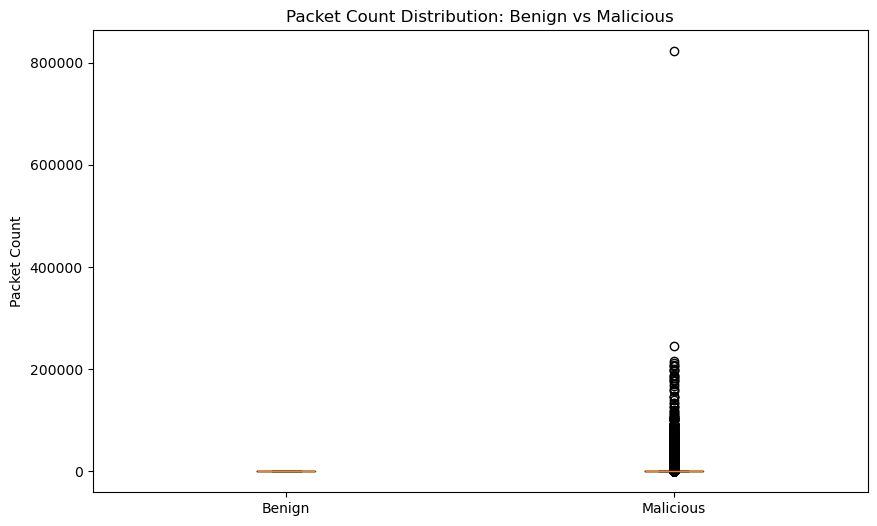

In [ ]:


from scipy import stats

benign_packets = net_df[net_df['Activity'] == 'Benign']['bidirectional_packets']
malicious_packets = net_df[net_df['Activity'] != 'Benign']['bidirectional_packets']

t_stat, p_value = stats.ttest_ind(benign_packets, malicious_packets)

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4e}")
print(f"Significant difference: {p_value < 0.05}")

# Visualization
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.boxplot([benign_packets, malicious_packets], labels=['Benign', 'Malicious'])
plt.ylabel('Packet Count')
plt.title('Packet Count Distribution: Benign vs Malicious')
